
# Project: Investigate a dataset TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I am investigating TMDB movies dataset that include the acotrs, budget, revenue, rating, etc.

I asked two questions for this project:

1- actor can improve the rating movie?

2- revenue increases over years?

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style('dark')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [5]:
df = pd.read_csv('tmdb-movies.csv')

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.shape

(10866, 21)

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


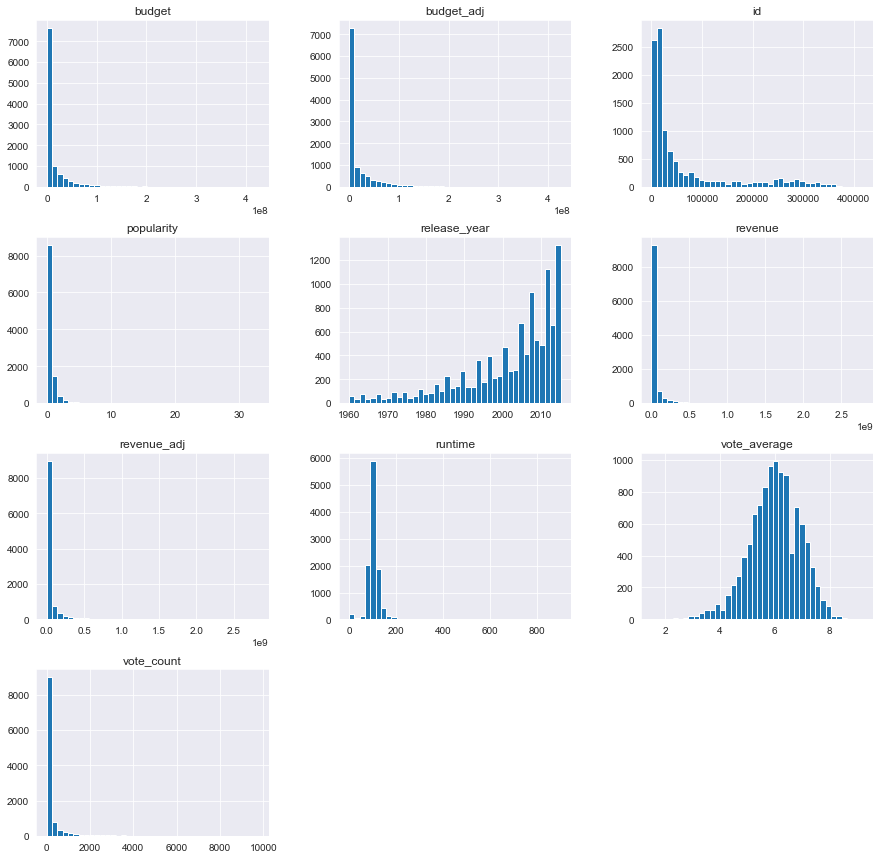

In [13]:
# distribution of columns
df.hist(figsize=(15,15) , bins=40);



### Data Cleaning 

In [366]:
# Drop the useless columns
df.drop(['id' , 'imdb_id' , 'original_title' , 'homepage' , 'tagline' , 'director','overview' , 'release_date' , 'keywords' ] , axis=1 , inplace=True)
df.head()

,popularity,budget,revenue,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [301]:
# Check if there is some null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   cast                  10790 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [302]:
# Trying to fill the null values with the mean
df.fillna(df.mean() , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   cast                  10790 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [303]:
# Some columns can not be cleaned with fillna so we drop the rows with the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9792 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9792 non-null   float64
 1   budget                9792 non-null   int64  
 2   revenue               9792 non-null   int64  
 3   cast                  9792 non-null   object 
 4   runtime               9792 non-null   int64  
 5   genres                9792 non-null   object 
 6   production_companies  9792 non-null   object 
 7   vote_count            9792 non-null   int64  
 8   vote_average          9792 non-null   float64
 9   release_year          9792 non-null   int64  
 10  budget_adj            9792 non-null   float64
 11  revenue_adj           9792 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 994.5+ KB


In [304]:
# Check if there is duplicated rows
df[df.duplicated()].count()

popularity              1
budget                  1
revenue                 1
cast                    1
runtime                 1
genres                  1
production_companies    1
vote_count              1
vote_average            1
release_year            1
budget_adj              1
revenue_adj             1
dtype: int64

In [305]:
# From the data above it seems that the there is one duplicated rows so we drop it
df.drop_duplicates(inplace=True)
print(df[df.duplicated()].count())

popularity              0
budget                  0
revenue                 0
cast                    0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


In [306]:
# From the data below we see that there are some colunms having | this character in the data 
# so we are going to solve this probelm
df.head(6)

,popularity,budget,revenue,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08


In [367]:
df[df['budget'] == 0]

,popularity,budget,revenue,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015,0.0,2.700677e+07
36,3.358321,0,22354572,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015,0.0,2.056620e+07
72,2.272044,0,45895,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,95,Thriller,Furthur Films,81,5.5,2015,0.0,4.222338e+04
74,2.165433,0,0,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0.0,0.000000e+00
75,2.141506,0,0,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966,0.0,0.000000e+00
10861,0.080598,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,Bruce Brown Films,11,7.4,1966,0.0,0.000000e+00
10862,0.065543,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.0,0.000000e+00
10863,0.065141,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.0,0.000000e+00


In [370]:
# When the budget equal to 0 that mean there is something wrong so we drop all rows having the budget equal to 0
df.drop(df[df['budget'] == 0].index, axis=0, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1
### Is a certain actor acting in a movie will increase the vote average of the movie ?

In [359]:
# To answer this question lets take Leonardo DiCaprio as an example
Leonardo = df.copy()
Leonardo.drop(Leonardo.index , inplace=True)
length = df.shape[0]
for i in range(0,length):
    j = df.iloc[i].cast.split('|')
    if 'Leonardo DiCaprio' in j:  
        Leonardo = Leonardo.append(df.iloc[i])
# now varible Leonardo has all the movies that Leonardo DiCaprio did act in it

In [360]:
Leonardo.head()

,popularity,budget,revenue,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
5,9.110700,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08
1919,9.363643,160000000,825500000,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,9767,7.9,2010,1.600000e+08,8.255000e+08
1927,3.176169,80000000,294804195,Leonardo DiCaprio|Mark Ruffalo|Ben Kingsley|Em...,138,Drama|Thriller|Mystery,Paramount Pictures|Appian Way|Phoenix Pictures...,3554,7.6,2010,8.000000e+07,2.948042e+08
2918,1.446456,70000000,113280098,Leonardo DiCaprio|Russell Crowe|Mark Strong|Al...,128,Action|Drama|Thriller,Scott Free Productions|De Line Pictures|Warner...,530,6.5,2008,7.089506e+07,1.147286e+08
3029,0.579470,35000000,75225693,Leonardo DiCaprio|Kate Winslet|Michael Shannon...,119,Drama|Romance,DreamWorks SKG|Scott Rudin Productions|BBC Fil...,430,6.5,2008,3.544753e+07,7.618758e+07


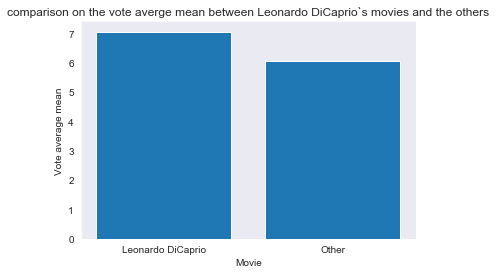

In [361]:
# here a comparison on the vote averge mean for all movies and the movies with Leonardo DiCaprio
mean_all = df.vote_average.mean()
mean_le = Leonardo.vote_average.mean()
plt.bar(['Leonardo DiCaprio' , 'Other'] , [mean_le , mean_all])
plt.title("comparison on the vote averge mean between Leonardo DiCaprio`s movies and the others")
plt.xlabel('Movie')
plt.ylabel("Vote average mean");

## Findings
So from the visual above we can find out that all films that Leonardo DiCaprio acted on that the vote average mean is higher that the all movies vote averge mean.
Which means audience seem to give a high vote in a movie that Leonardo DiCaprio acted on.

### Question 2
### Are the revenue of the movie increase over the years ?

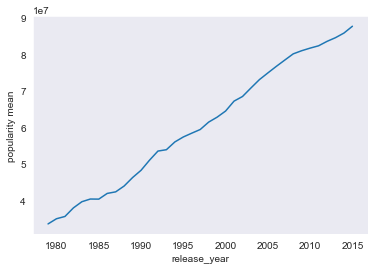

In [437]:
# calculating moving average
dq = df.groupby('release_year').revenue.mean()
plt.ylabel('popularity mean');
dq.rolling(window=20).mean().plot();

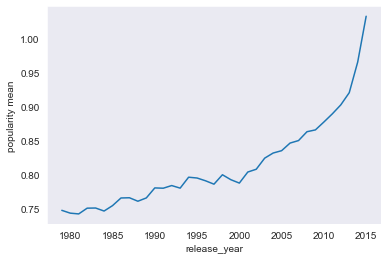

In [438]:
dq = df.groupby('release_year').popularity.mean()
plt.ylabel('popularity mean');
dq.rolling(window=20).mean().plot();

## Findings
From the visual above we notice that the revenue is increasing over years.

<a id='conclusions'></a>
## Conclusions


We explored about the vote average and the revenue
Vote average: we saw that a specified actor can make the movie better and make the people love it.
Revenue: revenue is increasing over years which is expected because the popularity of movies increased over years also.

## Limitations

During the data cleaning process,Unfortunately I tried to split the data seperated by '|' into lists for easy parsing during the exploration phase. But I coundn't find a way to do it. Spliting them would make the exploration easier and better.